# Analiza prostih delovnih mest

Zbrala in analizirala sem podatke o prostih delovnih mestih za študentsko delo, ki jih objavlja [e-Študentski servis](https://www.studentski-servis.com/studenti/delo/prosta-dela). Podatki so bili zajeti novembra 2018, zato so aktualne ponudbe zdaj lahko drugačne. Če želimo, jih osvežimo tako, da ponovno poženemo skripto za shranjevanje spletne strani in za zbiranje podatkov. 

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [66]:
podatki_o_delovnih_mestih = pd.read_csv('podatki/podatki_o_delu.csv', sep=';', index_col='sifra', error_bad_lines=False)

b'Skipping line 2827: expected 8 fields, saw 9\n'


Zbrani so podatki o nazivu dela, kratek opis, kje, kako dolgo in s kakšnim delovnim časom poteka delo, koliko mest je na voljo in plačilo. Za lažjo analizo, je znesek plačila brez enote. Povsod, kjer enot ni, gre za *nek znesek* €/h neto. Za nekatera dela imajo zapis o plačilo v opisno obliki, kot na primer: *10€ na anketo* ali *po projektu*.

In [67]:
podatki_o_delovnih_mestih


,delovno_mesto,placilo,lokacija,opis,st_prostih_mest,trajanje,delovnik
sifra,,,,,,,
280638,POMOČ V STREŽBI,"5,50",LJUBLJANA,Podjetje išče dve osebi za pomožna dela v stre...,2,PODOGOVORU,Popoldan
280636,ADMINISTRATIVNA DELA,"4,50",LJUBLJANA,Podjetje potrebuje osebo višjega letnika študi...,1,PO DOGOVORU,Po dogovoru
280635,DELO V KUHINJI,"5,00",LJUBLJANA,Podjetje išče osebi za pomivanje posode. Zaže...,2,PODOGOVORU,Popoldan
280634,DELO V PROIZVODNJI,"4,22",LJUBLJANA,Znano farmacevtsko podjetje potrebuje polnole...,1,DLJE ČASA,Izmensko
280633,MARKETING,"5,92",LJUBLJANA,"Iščejo samostojno, proaktivno, iznajdljivo, za...",1,DLJE ČASA,Dopoldan
280632,NAKLADANJE/ RAZKLADANJE,"6,76",LOGATEC,Potrebujejo dva kandidata za razkladanje konte...,2,5 11.2018,Dopoldan
280630,FOTOKOPIRANJE,"4,00",MARIBOR,Podjetje potrebuje spretne osebe za pomoč v fo...,3,DLJE ČASA,Izmensko
280629,DELO S STRANKAMI,"5,00",LJUBLJANA,"Obvezno odlično znanje italijanskega jezika, o...",1,DLJE ČASA,Po dogovoru
280628,ADMINISTRATIVNA DELA,"5,00",LJUBLJANA,"Iščejo študenta ali študentko, ki zaključuje š...",1,"OD 1 DO 2 MESECEV, MOŽNO PODALJŠANJE.",Dopoldan


Opis dela ne pride v poštev za analizo, zato bom stolpec z opisom dela izločila iz nabora podatkov. Vseeno ostane v zgornji tabeli, saj je lahko uporaben, če se zanimamo za posamezna dela.

In [68]:
dela = podatki_o_delovnih_mestih.drop(columns=['opis'])

Poglejmo najbolje plačana dela.

In [69]:
dela.drop(columns=['st_prostih_mest']).sort_values('placilo')

,delovno_mesto,placilo,lokacija,trajanje,delovnik
sifra,,,,,
279424,LAŽJA FIZIČNA DELA,"0,50 CENTOV/KOS (6 - 10 BRUTO€/H)",DOMŽALE Z OKOLICO,DLJE ČASA (PO DOGOVORU),Dopoldan
280493,UREJANJE BESEDIL,10 - 20 € BRUTO PO ČLANKU,LJUBLJANA,DLJE ČASA,Dopoldan
280387,STREŽBA,"10,00",DOMŽALE,31. 12. 2018,Popoldan
280381,HOSTES/A,"10,00",NEMČIJA,4 DNI,Dopoldan
274851,POUČEVANJE,"10,00",KOPER,DLJE ČASA,Po dogovoru
274849,POUČEVANJE,"10,00",LJUBLJANA,DLJE ČASA,Dopoldan
277931,PROGRAMIRANJE,"10,00",TRZIN,PO DOGOVORU,Dopoldan
280470,POUČEVANJE,"10,00",LJUBLJANA,PO DOGOVORU,Dopoldan
276385,STREŽBA,"10,00",LJUBLJANA,DLJE ČASA,Po dogovoru


Ponudbe za delo so večinoma v tekstovni obliki, zaradi česar je takšne podatke težje analizirati. Isto stvar se da povedati na različne načine. Vseeno, ko pogledamo, za koliko časa delodajalci razpisujejo dela, hitro opazimo, da v večini iščejo študente za dolgotrajnejše delo.

In [70]:
dela.groupby('trajanje').size().sort_values(ascending=False).head(8)

trajanje
 DLJE ČASA                    2083
 PO DOGOVORU                   663
 DLJE ČASA, PO POTREBI          37
 DLJE ČASA, PO DOGOVORU         25
 PO DOGOVORU, DLJE ČASA         18
 DALJ ČASA                      16
 DO SREDINE DECEMBRA            11
 DLJE ČASA OZ. PO DOGOVORU      10
dtype: int64

Po pričakovanjih je daleč največ ponudb za študentska dela v Ljubljani. Sledita Maribor in Celje.

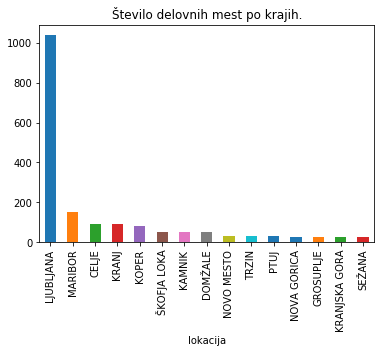

In [71]:
po_krajih = dela[['lokacija', 'st_prostih_mest']].groupby('lokacija').size().sort_values(ascending=False).head(15)
po_krajih.plot(kind='bar', title='Število delovnih mest po krajih.', stacked=True)

Največ študentskih del je v strežbi. To sem pričakovala, me je pa presenetilo kako velik procent študentskih del je pravzaprav strežba ali druga rutinska dela, kot so fizična dela in delo na terenu. V večini gre za dela, ki jih študent sprejme zato, da ima delo, in ne zato, ker bi si želel delati na taknem delovnem mestu.

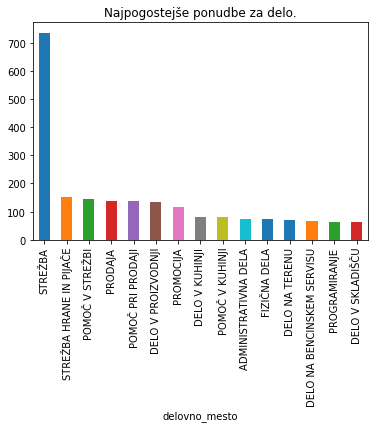

In [72]:
vrsta_dela = dela[['lokacija', 'delovno_mesto']].groupby('delovno_mesto').size().sort_values(ascending=False).head(15)
vrsta_dela.plot(kind='bar', title='Najpogostejše ponudbe za delo.', stacked=True)

Vidimo, da so študentska dela najpogosteje plačana minimalno, kar je 4 €/h neto. Precej veliko pa jih je z urno postavko 5 €/h.

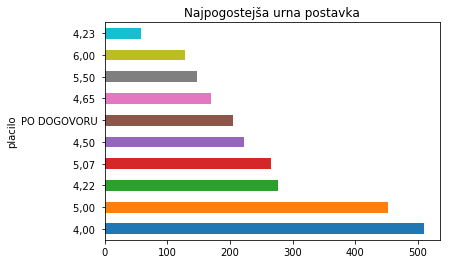

In [73]:
po_placilu = dela[['placilo']].groupby('placilo').size().sort_values(ascending=False).head(10)
po_placilu.plot(kind='barh', title='Najpogostejša urna postavka')

In [74]:
dela

,delovno_mesto,placilo,lokacija,st_prostih_mest,trajanje,delovnik
sifra,,,,,,
280638,POMOČ V STREŽBI,"5,50",LJUBLJANA,2,PODOGOVORU,Popoldan
280636,ADMINISTRATIVNA DELA,"4,50",LJUBLJANA,1,PO DOGOVORU,Po dogovoru
280635,DELO V KUHINJI,"5,00",LJUBLJANA,2,PODOGOVORU,Popoldan
280634,DELO V PROIZVODNJI,"4,22",LJUBLJANA,1,DLJE ČASA,Izmensko
280633,MARKETING,"5,92",LJUBLJANA,1,DLJE ČASA,Dopoldan
280632,NAKLADANJE/ RAZKLADANJE,"6,76",LOGATEC,2,5 11.2018,Dopoldan
280630,FOTOKOPIRANJE,"4,00",MARIBOR,3,DLJE ČASA,Izmensko
280629,DELO S STRANKAMI,"5,00",LJUBLJANA,1,DLJE ČASA,Po dogovoru
280628,ADMINISTRATIVNA DELA,"5,00",LJUBLJANA,1,"OD 1 DO 2 MESECEV, MOŽNO PODALJŠANJE.",Dopoldan


In [77]:
cisti[cisti.lokacija == 'LJUBLJANA'].sort_values('placilo')

,delovno_mesto,placilo,lokacija,st_prostih_mest,trajanje,delovnik
sifra,,,,,,
275410,POMOČ PRI PRODAJI,4.00,LJUBLJANA,1,DLJE ČASA,Po dogovoru
277292,FIGURANT,4.00,LJUBLJANA,4,DLJE ČASA,Dopoldan
272533,HOSTES/A,4.00,LJUBLJANA,3,DLJE ČASA,Popoldan
272398,DELO S STRANKAMI,4.00,LJUBLJANA,2,DLJE ČASA,Izmensko
279793,ANKETIRANJE PO TELEFONU,4.00,LJUBLJANA,2,DLJE ČASA,Popoldan
271095,BLAGAJNIK,4.00,LJUBLJANA,1,"DLJE ČASA, PO POTREBI",Izmensko
280320,DELO NA TERENU,4.00,LJUBLJANA,4,"DLJE ČASA, PO POTREBI",Po dogovoru
279791,POMOČ PRI PRODAJI,4.00,LJUBLJANA,1,PO DOGOVORU,Dopoldan
279779,ADMINISTRATIVNA DELA,4.00,LJUBLJANA,1,DLJE ČASA,Dopoldan


In [92]:
cisti[cisti.lokacija == 'LJUBLJANA'].groupby('placilo').size().sort_values()

placilo
18.00      1
5.93       1
5.90       1
5.83       1
5.81       1
4.75       1
5.80       1
4.82       1
4.86       1
5.79       1
4.97       1
5.36       1
15.00      1
5.15       1
5.30       1
5.22       1
5.24       1
6.20       1
5.25       1
8.75       1
6.35       1
4.47       1
4.44       1
6.40       1
6.70       1
4.37       1
6.86       1
8.27       1
6.30       1
9.29       1
        ... 
8.45       4
4.70       4
4.20       5
6.97       5
4.01       6
4.31       6
8.00       7
4.56       7
4.80       7
4.90       7
4.40       7
4.39       7
4.06       8
6.50       8
4.23      10
4.48      11
4.30      11
4.73      13
7.00      13
5.49      15
6.76      18
5.92      23
6.00      46
5.50      47
4.65      66
4.50      81
4.22      81
5.07      94
4.00     111
5.00     185
Length: 82, dtype: int64

In [100]:
po_krajih = cisti.groupby('lokacija')

In [122]:
po_krajih.mean().round(2).sort_values('placilo')

po_krajih.size()[po_krajih.size() > 10].sort_values()

lokacija
RADOMLJE               11
ŽALEC                  12
MURSKA SOBOTA          12
MARIBOR CENTER         12
VELENJE                13
LESCE                  13
MEDVODE                13
SLOVENSKA BISTRICA     14
VRHNIKA                17
SEVNICA                17
BLED                   20
LOGATEC                20
IZOLA                  20
PORTOROŽ               22
JESENICE               23
MENGEŠ                 23
SEŽANA                 24
GROSUPLJE              25
NOVA GORICA            26
KRANJSKA GORA          27
POSTOJNA               27
TRZIN                  29
NOVO MESTO             29
PTUJ                   29
ŠKOFJA LOKA            49
DOMŽALE                50
KAMNIK                 50
KOPER                  77
KRANJ                  83
CELJE                  86
MARIBOR               140
LJUBLJANA             990
dtype: int64

In [ ]:
dela.groupby('delovno_mesto').max().sort_values('st_prostih_mest', ascending=False).head(10).drop(columns=['placilo', 'delovnik'])

In [ ]:
dela.groupby('lokacija').max().sort_values('st_prostih_mest', ascending=False).head(10).drop(columns=['placilo', 'delovnik'])

In [ ]:
dela.groupby('lokacija')

In [ ]:
dela[dela.lokacija == 'NOVA GORICA']

In [ ]:
dela[dela['LJUBLJANA'].isin(dela['lokacija'])]

In [ ]:
dela.sort_values('sifra')

In [ ]:
dela['lokacija'].value_counts().head(10)

In [ ]:
dela.groupby('delovnik').size().plot()

In [ ]:
dela.plot.scatter('st_prostih_mest', 'st_prostih_mest')

In [ ]:
dela.sort_values('lokacija')

Zanimalo me je tudi, koliko je največje število študentov, ki jih sprejmejo na neko delovno mesto.

In [143]:
dela.st_prostih_mest.count()


3210

In [97]:
cisti = pd.read_csv('podatki/precisceni.csv', sep=';', index_col='sifra').drop(columns='opis')

In [98]:
cisti.sort_values('placilo')

,delovno_mesto,placilo,lokacija,st_prostih_mest,trajanje,delovnik
sifra,,,,,,
276660,KOMERCIALNA DELA,4.00,VRHNIKA,1,DLJE ČASA,Po dogovoru
279620,DELO NA BENCINSKEM SERVISU,4.00,TRBOVLJE,1,DLJE ČASA,Izmensko
279612,RAZVOZ,4.00,ŠENTJAKOB,1,DLJE ČASA,Po dogovoru
279606,POMOČ V TRGOVINI,4.00,KRANJ,1,DLJE ČASA,Po dogovoru
279600,BLAGAJNIK,4.00,ŠKOFLJICA,2,DLJE ČASA,Izmensko
279592,FIZIČNA DELA,4.00,LJUBLJANA,1,DLJE ČASA,Po dogovoru
273465,DELO NA RECEPCIJI,4.00,BLED,1,PO DOGOVORU,Izmensko
273470,DELO NA BENCINSKEM SERVISU,4.00,SEŽANA,1,DLJE ČASA,Po dogovoru
273477,DELO V PROIZVODNJI,4.00,VRBNO ALI PRISTAVA PRI MESTINJU,3,DLJE ČASA,Izmensko
